Math 5750/6880: Mathematics of Data Science \
Project 2

# 1. Clustering Gaussian Blobs using $k$-means

In [2]:
# --- Imports ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix

from scipy.optimize import linear_sum_assignment  # Hungarian algorithm

# Generate 5 Gaussian blobs in 10 dimensions
X, y_true = make_blobs(
    n_samples=1000,
    centers=5,
    n_features=10,
    cluster_std=1.5,       # loose
    random_state=1)        # reproducibility
X = StandardScaler().fit_transform(X)

print(type(X),X.shape)
print(type(y_true),y_true.shape)

<class 'numpy.ndarray'> (1000, 10)
<class 'numpy.ndarray'> (1000,)



[Result] Smallest KMeans inertia (k=5): 924.3160


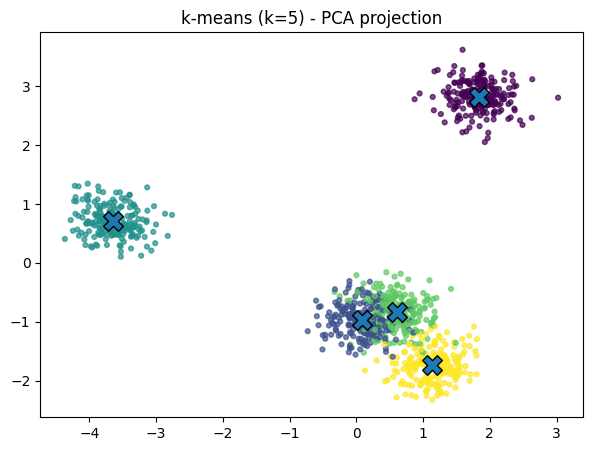

,pred_0,pred_1,pred_2,pred_3,pred_4
true_0,200,0,0,0,0
true_1,0,200,0,0,0
true_2,0,0,200,0,0
true_3,0,0,0,200,0
true_4,0,0,0,0,200


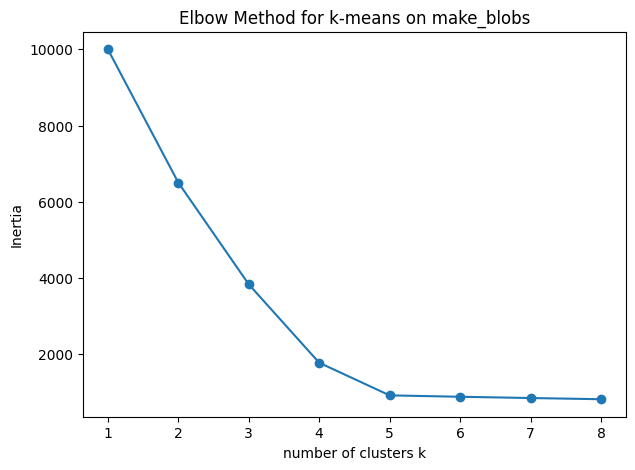

In [4]:
# your code here

# ========== perform a k-means cluster analysis with k = 5 ==========
k = 5
kmeans = KMeans(n_clusters=k, n_init=30, random_state=1)
kmeans.fit(X)

# ========== Report your smallest k-means inertia value ==========
best_inertia = kmeans.inertia_ #record the smallest inertia
print(f"\n[Result] Smallest KMeans inertia (k=5): {best_inertia:.4f}")

# ========== Make a 2D visualization of your clusters via PCA, including both the clusters (colored by cluster) and the cluster centers ==========
labels_pred = kmeans.labels_

pca = PCA(n_components=2, random_state=1)
X2 = pca.fit_transform(X)
centers2 = pca.transform(kmeans.cluster_centers_)

plt.figure(figsize=(7, 5))
plt.scatter(X2[:, 0], X2[:, 1], c=labels_pred, s=12, alpha=0.7)
plt.scatter(centers2[:, 0], centers2[:, 1], marker='X', s=200, edgecolor='k', linewidth=1.0)
plt.title("k-means (k=5) - PCA projection")
plt.show()

# ========== make a confusion matrix that compares your assigned labels to the “true” labels ==========
confusion1 = confusion_matrix(y_true, labels_pred)

row, col = linear_sum_assignment(-confusion1) # to match the pred labels with true labels

pred_to_true = {pred: true for true, pred in zip(row, col)}

labels_remapped = np.vectorize(lambda p: pred_to_true[p])(labels_pred)

confusion1_aligned = confusion_matrix(y_true, labels_remapped)

df_conf = pd.DataFrame(confusion1_aligned,index=[f"true_{i}" for i in range(k)],columns=[f"pred_{i}" for i in range(k)])
display(df_conf)

# ========== elbow analysis ==========
k_values = list(range(1, 8 + 1))
inertias = []
for k_current in k_values:
    km = KMeans(n_clusters=k_current, n_init=10, random_state=1).fit(X)
    inertias.append(km.inertia_)

plt.figure(figsize=(7, 5))
plt.plot(k_values, inertias, marker='o')
plt.title("Elbow Method for k-means on make_blobs")
plt.xlabel("number of clusters k")
plt.ylabel("Inertia")
plt.xticks(k_values)
plt.show()


# 2. Clustering Fashion-MNIST using $k$-means

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from scipy.optimize import linear_sum_assignment
from IPython.display import display
from sklearn.decomposition import PCA

# Load Fashion-MNIST from OpenML
# Classes (0-9): T-shirt/top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, Ankle boot
X, y = fetch_openml("Fashion-MNIST", version=1, as_frame=False, parser="auto", return_X_y=True)
y = y.astype(int)

print(type(X),X.shape)
print(type(y),y.shape)

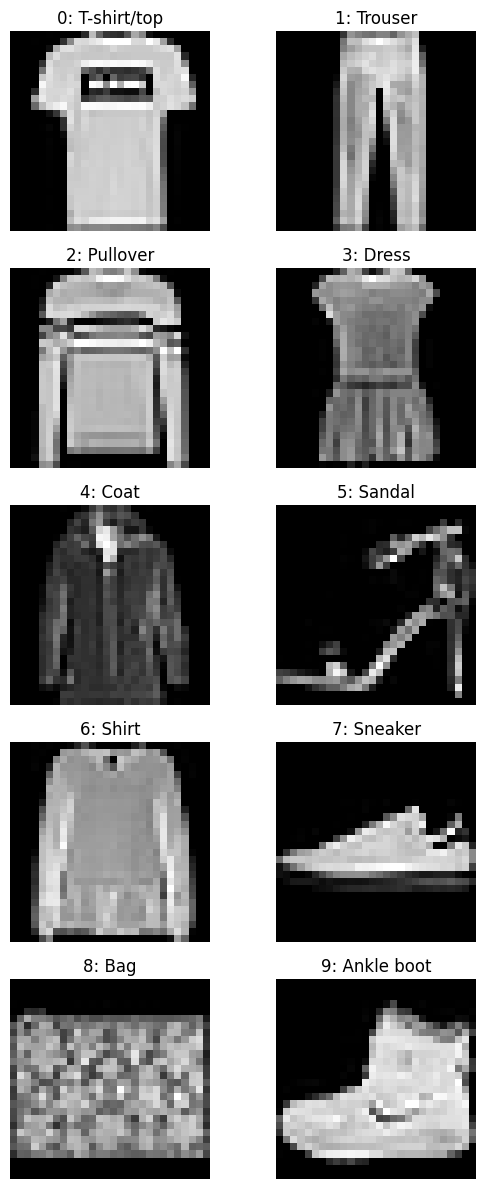


[Result] Smallest KMeans inertia (k=5): 19604098.0000


,pred_0,pred_1,pred_2,pred_3,pred_4,pred_5,pred_6,pred_7,pred_8,pred_9
true_0:T-shirt/top,4033,214,57,2,140,575,1947,4,28,0
true_1:Trouser,261,6313,5,0,65,166,189,0,1,0
true_2:Pullover,156,13,33,1,4103,537,2080,4,72,1
true_3:Dress,1866,3722,0,0,50,548,808,0,5,1
true_4:Coat,1063,211,7,0,4136,290,1234,0,59,0
true_5:Sandal,1,2,0,287,0,4592,48,1587,12,471
true_6:Shirt,1293,68,101,3,2191,848,2445,8,41,2
true_7:Sneaker,0,0,0,17,0,643,0,5595,0,745
true_8:Bag,47,20,2476,28,166,445,606,353,2695,164
true_9:Ankle boot,9,4,1,2352,3,197,61,291,0,4082


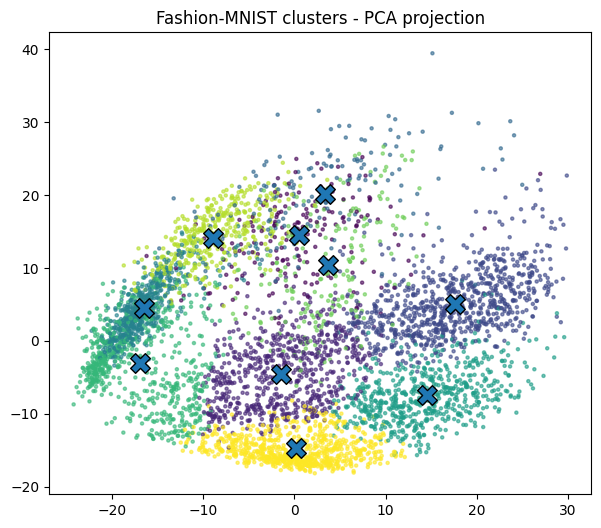

In [23]:
# your code here
CLASS_NAMES = [
    "T-shirt/top","Trouser","Pullover","Dress","Coat",
    "Sandal","Shirt","Sneaker","Bag","Ankle boot"
]

# ========== first make a 5×2 array of figures, each plotting a distinct article of clothing ==========

# get all types
samples = [] # set an array
for label in range(10):
    idx = np.where(y == label)[0][0]  # get the first of each type
    samples.append(idx)

# draw the graphs
fig, axes = plt.subplots(5, 2, figsize=(6, 12))
for k, ax in enumerate(axes.ravel()):
    img = X[samples[k]].reshape(28, 28)
    ax.imshow(img, cmap="gray")
    ax.set_title(f"{k}: {CLASS_NAMES[k]}")
    ax.axis("off")
plt.tight_layout()
plt.show()

# ========== standardlization ==========
X01 = X.astype(np.float32) / 255.0  # scale into [0,1]
scaler = StandardScaler()  # standardlization
X_scaled = scaler.fit_transform(X01).astype(np.float32)

pca = PCA(n_components=50, svd_solver="randomized", random_state=1)
X_pca = pca.fit_transform(X_scaled).astype(np.float32)

# ========== perform a k-means cluster analysis with k = 10 ==========
k = 10
kmeans = KMeans(n_clusters=k,n_init=10,random_state=1)
kmeans.fit(X_pca)

best_inertia = kmeans.inertia_
print(f"\n[Result] Smallest KMeans inertia (k=5): {best_inertia:.4f}")

# ========== make a confusion matrix that compares your assigned labels to the “true” labels ==========
confusion2 = confusion_matrix(y, labels_pred, labels=range(k))

row1, col1 = linear_sum_assignment(-confusion2)

pred_to_true1 = {int(col): int(row) for row, col in zip(row1, col1)}

labels_aligned1 = np.vectorize(lambda p: pred_to_true1[p])(labels_pred)

confusion_aligned1 = confusion_matrix(y, labels_aligned1, labels=range(k))
acc = accuracy_score(y, labels_aligned1)

df_conf = pd.DataFrame(confusion_aligned1,index=[f"true_{i}:{CLASS_NAMES[i]}" for i in range(k)],columns=[f"pred_{i}" for i in range(k)])
display(df_conf)

# ========== Make a 2D visualization of your clusters via PCA, including both the clusters (colored by cluster) and the cluster centers ==========

labels_pred = kmeans.labels_      # get labels
centers_pca = kmeans.cluster_centers_

pca1 = PCA(n_components=2, random_state=1)
X1 = pca1.fit_transform(X_scaled).astype(np.float32)

rng = np.random.default_rng(1)
plot_idx = rng.choice(X1.shape[0], size=5000, replace=False)

centers_scaled = pca.inverse_transform(centers_pca).astype(np.float32)
centers1 = pca1.transform(centers_scaled).astype(np.float32)

plt.figure(figsize=(7, 6))
plt.scatter(X1[plot_idx, 0], X1[plot_idx, 1],
            c=labels_pred[plot_idx], s=5, alpha=0.6)
plt.scatter(centers1[:, 0], centers1[:, 1],
            marker='X', s=200, edgecolor='k', linewidth=1.0)
plt.title("Fashion-MNIST clusters - PCA projection")
plt.show()




# 3. Dimensionality reduction for Fashion-MNIST

In [1]:
# your code here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.random_projection import GaussianRandomProjection
from sklearn.metrics import pairwise_distances

np.random.seed(1)

# sample and target dimensiona
N_SUB = 3000    # for faster
KS = [10, 20, 50, 100, 200]

# ========== Import the data and center/scale as appropriate ==========

X01 = X.astype(np.float32) / 255.0  # scale into [0,1]
scaler = StandardScaler()
X_std = scaler.fit_transform(X01).astype(np.float32) # high dimensional data
print("Standardized X shape:", X_std.shape)

idx = np.random.choice(len(X_std), size=N_SUB, replace=False)
X_sub = X_std[idx]
y_sub = y[idx]
print("Subset shape:", X_sub.shape)

# original space
D_orig = pairwise_distances(X_sub, metric="euclidean")
triu_idx = np.triu_indices_from(D_orig, k=1)
d_orig_vec = D_orig[triu_idx]
print("Number of pairwise distances used:", d_orig_vec.shape[0])

# save result
corr_pca = []
corr_rp  = []

# ========== Implement both PCA and Random Projection methods for target dimensions k ∈ {10,20,50,100,200}
# ========== For each reduced dataset, compute the correlation between pairwise distances in the original standardized space and the reduced space.

for k in KS:
    # PCA
    pca = PCA(n_components=k)
    X_pca = pca.fit_transform(X_sub)
    D_pca = pairwise_distances(X_pca)
    c_pca = np.corrcoef(d_orig, D_pca[triu_idx])[0, 1]
    corr_pca.append(c_pca)

    # Random projection
    rp = GaussianRandomProjection(n_components=k)
    X_rp = rp.fit_transform(X_sub)
    D_rp = pairwise_distances(X_rp)
    c_rp = np.corrcoef(d_orig, D_rp[triu_idx])[0, 1]
    corr_rp.append(c_rp)

    print(f"k={k:3d} | corr(PCA)={c_pca:.4f} | corr(RandomProj)={c_rp:.4f}")

df = pd.DataFrame({"k": KS, "PCA": corr_pca, "RandomProj": corr_rp})
print(df)

# ========== Make a plot of this correlation vs. k for the two methods
plt.figure(figsize=(7, 5))
plt.plot(KS, corr_pca, marker='o', label='PCA')
plt.plot(KS, corr_rp,  marker='o', label='Random Projection')
plt.title("Correlation of Pairwise Distances vs Dimension k\n(Fashion-MNIST subset)")
plt.xlabel("k (target dimension)")
plt.ylabel("Pearson correlation")
plt.xticks(KS)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()



NameError: name 'X' is not defined

# 4. Clustering Fashion-MNIST using spectral clustering

Raw: (70000, 784) (70000,)
Standardized: (70000, 784)
Subsample: (3000, 784) (3000,)
PCA(50) shape: (3000, 50) | explained variance sum: 0.81417316

=== Spectral Clustering ===
[Label mapping] pred -> true: {np.int64(8): np.int64(0), np.int64(4): np.int64(1), np.int64(5): np.int64(2), np.int64(0): np.int64(3), np.int64(2): np.int64(4), np.int64(7): np.int64(5), np.int64(1): np.int64(6), np.int64(3): np.int64(7), np.int64(6): np.int64(8), np.int64(9): np.int64(9)}
Accuracy (after optimal permutation): 0.5727
ARI: 0.4113 | NMI: 0.5929 | Silhouette(50D): 0.1328


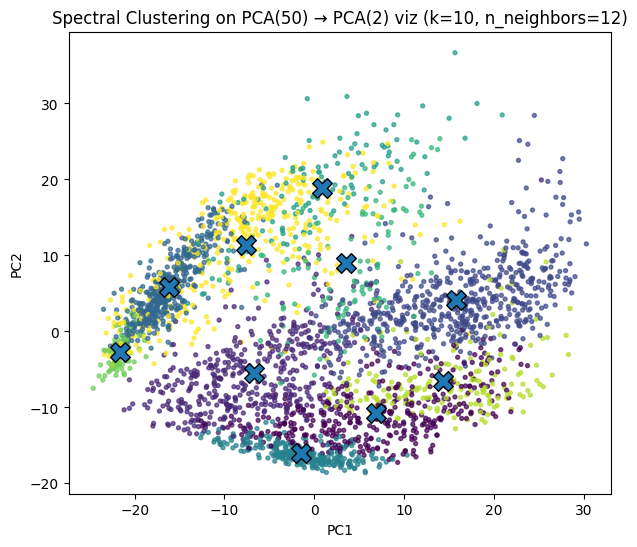


=== KMeans (for comparison) ===
[Label mapping] pred -> true: {np.int64(8): np.int64(0), np.int64(3): np.int64(1), np.int64(1): np.int64(2), np.int64(4): np.int64(3), np.int64(2): np.int64(4), np.int64(6): np.int64(5), np.int64(7): np.int64(6), np.int64(9): np.int64(7), np.int64(0): np.int64(8), np.int64(5): np.int64(9)}
Accuracy (after optimal permutation): 0.4833
ARI: 0.3355 | NMI: 0.4941 | Silhouette(50D): 0.1878

=== Summary (same 3000 subset, 50D) ===
Spectral:  ACC=0.5727  ARI=0.4113  NMI=0.5929  SIL=0.1328
KMeans  :  ACC=0.4833  ARI=0.3355  NMI=0.4941  SIL=0.1878


In [4]:
# your code here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import SpectralClustering, KMeans
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, silhouette_score
from scipy.optimize import linear_sum_assignment

X, y = fetch_openml("Fashion-MNIST", version=1, as_frame=False, parser="auto", return_X_y=True)
y = y.astype(int)

print("Raw:", X.shape, y.shape)

X01 = (X.astype(np.float32) / 255.0)
scaler = StandardScaler()
X_std = scaler.fit_transform(X01).astype(np.float32)
print("Standardized:", X_std.shape)

RNG_SEED = 1
rng = np.random.default_rng(RNG_SEED)

N_SUB = 3000
idx_sub = rng.choice(X_std.shape[0], size=min(N_SUB, X_std.shape[0]), replace=False)

X_sub = X_std[idx_sub]
y_sub = y[idx_sub]
print("Subsample:", X_sub.shape, y_sub.shape)

pca50 = PCA(n_components=50, svd_solver="randomized", random_state=RNG_SEED)
X50 = pca50.fit_transform(X_sub).astype(np.float32)
print("PCA(50) shape:", X50.shape, "| explained variance sum:", pca50.explained_variance_ratio_.sum())

# ========== use spectral clustering to cluster the data
k = 10
N_NEI = 12

spec = SpectralClustering(
    n_clusters=k,
    eigen_solver="arpack",
    affinity="nearest_neighbors",
    n_neighbors=N_NEI,
    assign_labels="kmeans",
    random_state=RNG_SEED,
    n_init=10
)

labels_spec = spec.fit_predict(X50)

def align_and_report(y_true, y_pred, title=""):
    C = confusion_matrix(y_true, y_pred, labels=range(k))
    row_ind, col_ind = linear_sum_assignment(-C)  # maximize diagonal
    pred2true = {pred: true for true, pred in zip(row_ind, col_ind)}
    y_aligned = np.vectorize(lambda p: pred2true[p])(y_pred)

    C_aligned = confusion_matrix(y_true, y_aligned, labels=range(k))
    acc = accuracy_score(y_true, y_aligned)
    ari = adjusted_rand_score(y_true, y_pred)             # permutation-invariant
    nmi = normalized_mutual_info_score(y_true, y_pred)    # permutation-invariant
    sil = silhouette_score(X50, y_pred, metric="euclidean")  # quality within 50D space

    print(f"\n=== {title} ===")
    print("[Label mapping] pred -> true:", pred2true)
    print("Accuracy (after optimal permutation): {:.4f}".format(acc))
    print("ARI: {:.4f} | NMI: {:.4f} | Silhouette(50D): {:.4f}".format(ari, nmi, sil))

    df = pd.DataFrame(
        C_aligned,
        index=[f"true_{i}" for i in range(k)],
        columns=[f"pred_{i}" for i in range(k)]
    )
    return df, acc, ari, nmi, sil

df_spec, acc_spec, ari_spec, nmi_spec, sil_spec = align_and_report(y_sub, labels_spec, title="Spectral Clustering")

pca2 = PCA(n_components=2, random_state=RNG_SEED)
X2 = pca2.fit_transform(X50).astype(np.float32)

centers2 = np.vstack([X2[labels_spec == c].mean(axis=0) for c in range(k)])

plt.figure(figsize=(7, 6))
plt.scatter(X2[:, 0], X2[:, 1], c=labels_spec, s=8, alpha=0.7)
plt.scatter(centers2[:, 0], centers2[:, 1], marker='X', s=200, edgecolor='k', linewidth=1.0)
plt.title(f"Spectral Clustering on PCA(50) → PCA(2) viz (k={k}, n_neighbors={N_NEI})")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.show()

km = KMeans(n_clusters=k, n_init=20, random_state=RNG_SEED)
labels_km = km.fit_predict(X50)

df_km, acc_km, ari_km, nmi_km, sil_km = align_and_report(y_sub, labels_km, title="KMeans (for comparison)")

print("\n=== Summary (same 3000 subset, 50D) ===")
print(f"Spectral:  ACC={acc_spec:.4f}  ARI={ari_spec:.4f}  NMI={nmi_spec:.4f}  SIL={sil_spec:.4f}")
print(f"KMeans  :  ACC={acc_km:.4f}  ARI={ari_km:.4f}  NMI={nmi_km:.4f}  SIL={sil_km:.4f}")
